In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedKFold
import seaborn as sns
from sklearn.metrics import classification_report
from scipy.stats import loguniform
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(42)

In [2]:
AA="C:/Users/ganes/oneDrive/Desktop/AI/New Zeolite/FD/FDCWOA-Final.xlsx"
df=pd.read_excel(AA)
df.head(5)
df=pd.read_excel(AA)
df.head(5)
df.shape


(1330, 16)

In [3]:
A=df['Ge/Si']
B=df["Al/T"]
C = df['OH/T']
D = df['H2O/T']
E = df["F/T"]
F=df['OSDA/T']
G=df["B/T"]
H = df['Na2O/T']
I = df['Cl/T']
J=df['Temperature']
K=df["time"]
L = df['AR']
M=df['Area']
N= df['C/N']
O= df['rpm']
List = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O]
List1=pd.concat(List, axis=1, sort=True)
List1.head(5)
List1.shape


(1330, 15)

In [4]:
X_OS=List1
Y_OS=df["FDC"]

train accuracy 0.9973266499582287
test accuracy 0.9781954887218045
train precision 0.9902352525829909
test precision 0.9437261758837387
train recall 0.994105795731954
test recall 0.930184361093452
train f1 0.9921310926634149
test f1 0.9330466265065658
train               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1086
           1       0.99      0.98      0.99       111

    accuracy                           1.00      1197
   macro avg       0.99      0.99      0.99      1197
weighted avg       1.00      1.00      1.00      1197

test               precision    recall  f1-score   support

           0       0.98      1.00      0.99       120
           1       1.00      0.85      0.92        13

    accuracy                           0.98       133
   macro avg       0.99      0.92      0.95       133
weighted avg       0.99      0.98      0.98       133

Matthews correlation coefficient Train 0.9843097537501453
Matthews correlation coef

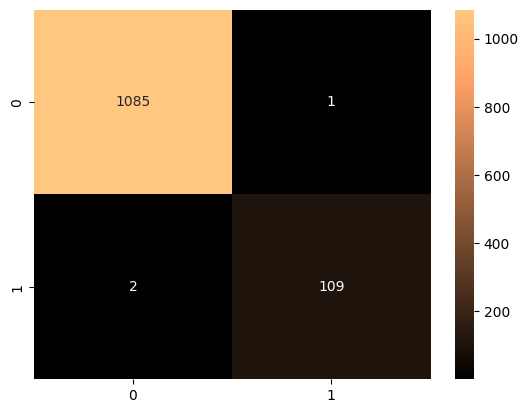

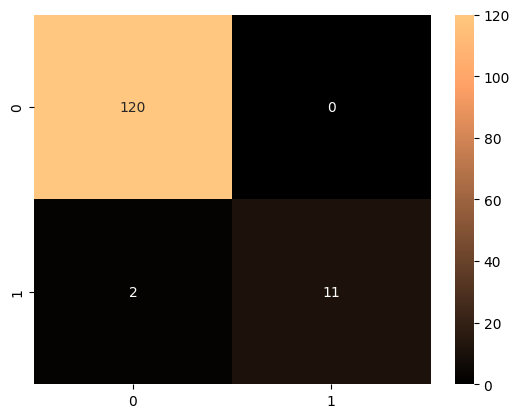

In [5]:
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_RFtrain=list()
mmc_RFtest=list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    RF=RandomForestClassifier(random_state=1,)
    rf_model=RF.fit(X_Train,Y_Train)
    predict_RFTrain=RF.predict(X_Train)
    predict_RFTest=RF.predict(X_Test)
    Acctrain = metrics.accuracy_score(Y_Train, predict_RFTrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_RFTest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_RFTrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_RFTest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_RFTrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_RFTest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_RFTrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_RFTest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_RFTrain)
    conf_matrix_Train.append(conf_matrix1)
    conf_matrix2 = confusion_matrix(Y_Test, predict_RFTest)
    conf_matrix_Test.append(conf_matrix2)
    mmctrain= metrics.matthews_corrcoef(Y_Train, predict_RFTrain)
    mmctest= metrics.matthews_corrcoef(Y_Test, predict_RFTest)
    mmc_RFtrain.append(mmctrain)
    mmc_RFtest.append(mmctest)
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_RFTrain))
print("test", metrics.classification_report(Y_Test, predict_RFTest)) 
print('Matthews correlation coefficient Train',mean(mmc_RFtrain))
print('Matthews correlation coefficient Test',mean(mmc_RFtest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


train accuracy 0.9951545530492899
test accuracy 0.974436090225564
train precision 0.9884243062954148
test precision 0.9373761077966309
train recall 0.9828547578276904
test recall 0.9096749841068024
train f1 0.9855967744463733
test f1 0.9200242296683723
train               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1086
           1       0.99      0.96      0.98       111

    accuracy                           1.00      1197
   macro avg       0.99      0.98      0.99      1197
weighted avg       1.00      1.00      1.00      1197

test               precision    recall  f1-score   support

           0       0.98      0.99      0.98       120
           1       0.91      0.77      0.83        13

    accuracy                           0.97       133
   macro avg       0.94      0.88      0.91       133
weighted avg       0.97      0.97      0.97       133

Matthews correlation coefficient Train 0.9712449660498226
Matthews correlation coe

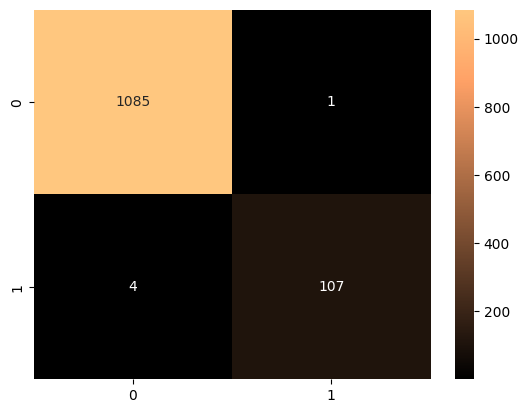

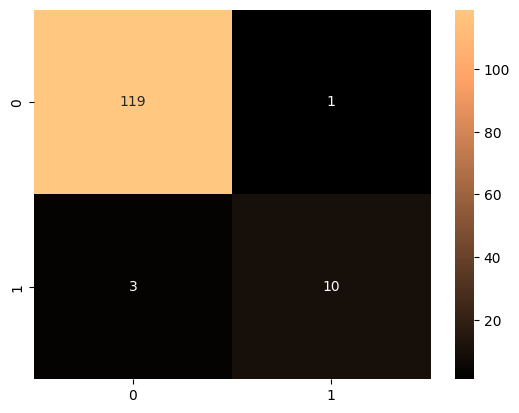

In [8]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_gbtrain=list()
mmc_gbtest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    GB = GradientBoostingClassifier(random_state=1,learning_rate=0.01,
                                min_samples_leaf=2, n_estimators=1500  )
                                
    gb_model=GB.fit(X_Train, Y_Train)
    predict_gbtrain=GB.predict(X_Train)
    predict_gbtest=GB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_gbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_gbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_gbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_gbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_gbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_gbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_gbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_gbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_gbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_gbtest)
    mmc_train= metrics.matthews_corrcoef(Y_Train, predict_gbtrain)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_gbtest)
    mmc_gbtrain.append(mmc_train)
    mmc_gbtest.append(mmc_test)
    
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_gbtrain))
print("test", metrics.classification_report(Y_Test, predict_gbtest))
print('Matthews correlation coefficient Train',mean(mmc_gbtrain))
print('Matthews correlation coefficient Test',mean(mmc_gbtest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()



 98%|===================| 1172/1197 [00:34<00:00]        

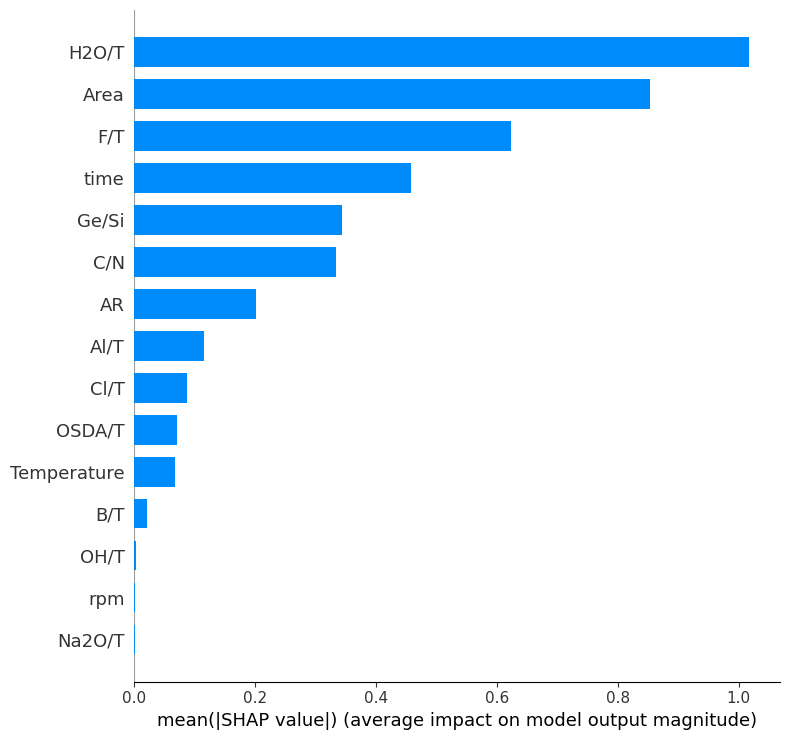

In [9]:
import shap
explainer = shap.TreeExplainer(GB, X_Train)
shap_values_GB = explainer.shap_values(X_Train)
shap.summary_plot(shap_values_GB, X_Train, plot_type='bar')

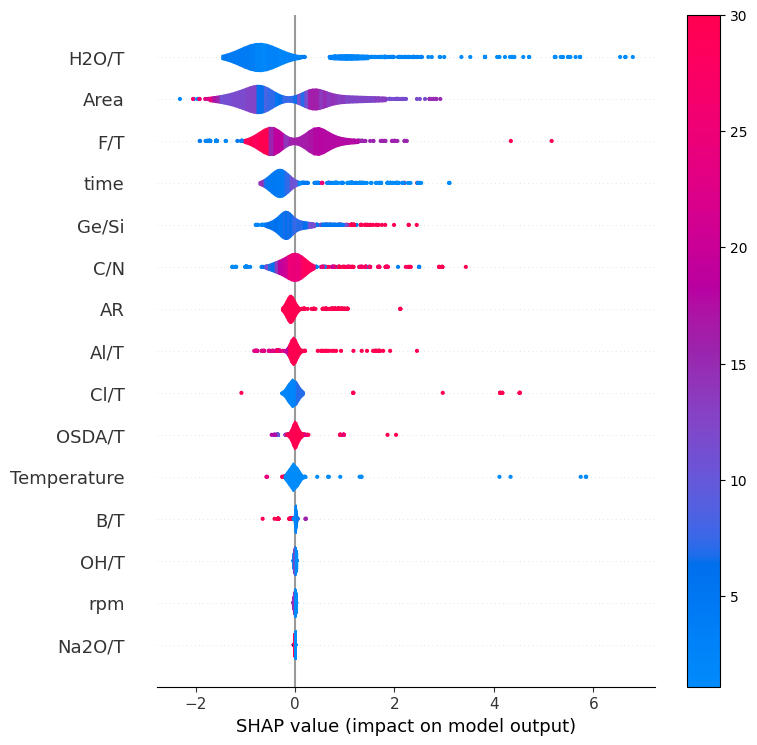

In [11]:
shap.summary_plot(shap_values_GB, X_Train, show = False, color_bar = False, plot_type="violin")
plt.colorbar()
plt.show()

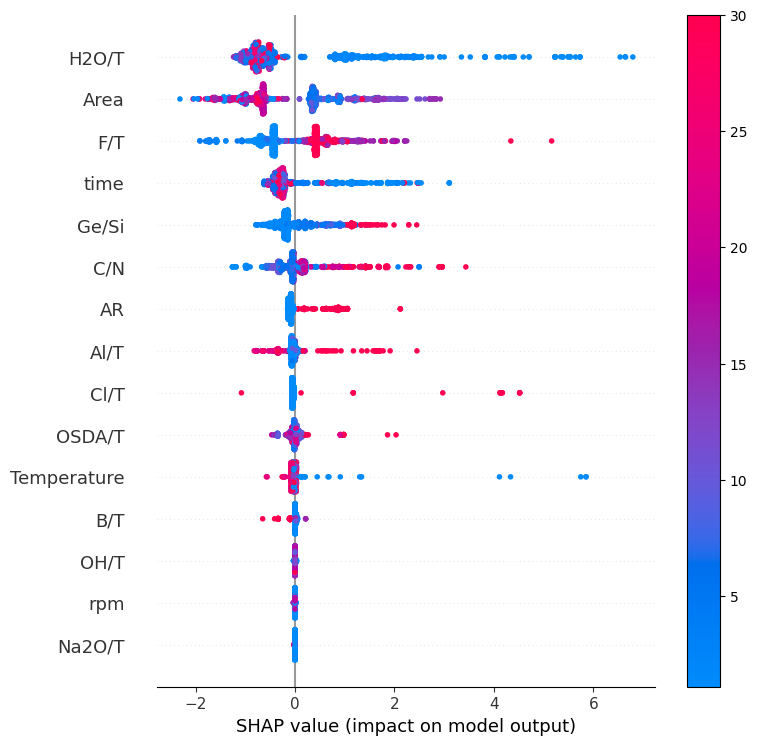

In [13]:
shap.summary_plot(shap_values_GB, X_Train, show = False, color_bar = False,)
plt.colorbar()

train accuracy 0.9965747702589809
test accuracy 0.9781954887218044
train precision 0.9859216355739452
test precision 0.9348740604459653
train recall 0.9940915221112601
test recall 0.9411172917991101
train f1 0.9899570463038471
test f1 0.9358242460377566
train               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1086
           1       0.97      0.99      0.98       111

    accuracy                           1.00      1197
   macro avg       0.99      0.99      0.99      1197
weighted avg       1.00      1.00      1.00      1197

test               precision    recall  f1-score   support

           0       0.98      0.99      0.99       120
           1       0.92      0.85      0.88        13

    accuracy                           0.98       133
   macro avg       0.95      0.92      0.93       133
weighted avg       0.98      0.98      0.98       133

Matthews correlation coefficient Train 0.979973925595551
Matthews correlation coe

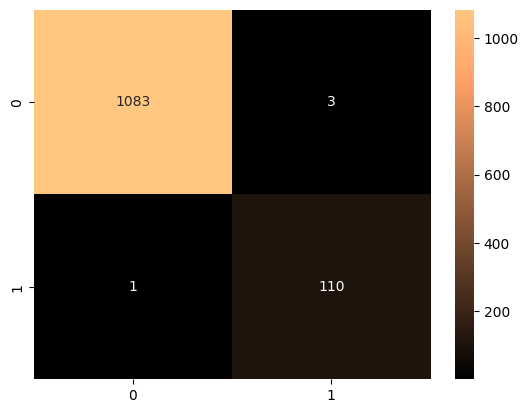

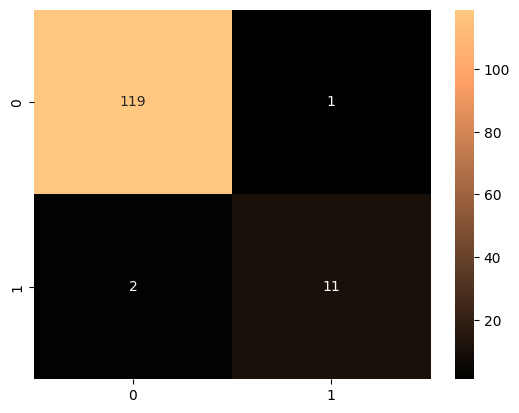

In [21]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_xgbtrain=list()
mmc_xgbtest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
XGB = XGBClassifier(random_state=1, )
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    XGB = XGBClassifier(random_state=1, n_estimators=1000,
                        learning_rate=0.8, alpha=0.1, colsample_bytree=0.5 )
    xgb_model=XGB.fit(X_Train, Y_Train)
    predict_xgbtrain=XGB.predict(X_Train)
    predict_xgbtest=XGB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_xgbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_xgbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_xgbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_xgbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_xgbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_xgbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_xgbtest)
    mmc_train= metrics.matthews_corrcoef(Y_Train, predict_xgbtrain)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_xgbtest)
    mmc_xgbtrain.append(mmc_train)
    mmc_xgbtest.append(mmc_test)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_xgbtrain))
print("test", metrics.classification_report(Y_Test, predict_xgbtest))
print('Matthews correlation coefficient Train',mean(mmc_xgbtrain))
print('Matthews correlation coefficient Test',mean(mmc_xgbtest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


train accuracy 0.9786967418546364
test accuracy 0.9661654135338346
train precision 0.9678463123423822
test precision 0.9482298128445728
train recall 0.9030183501760538
test recall 0.8476454227590591
train f1 0.9322262001976099
test f1 0.8854687508339476
train               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1086
           1       0.95      0.80      0.87       111

    accuracy                           0.98      1197
   macro avg       0.96      0.90      0.93      1197
weighted avg       0.98      0.98      0.98      1197

test               precision    recall  f1-score   support

           0       0.94      1.00      0.97       120
           1       1.00      0.46      0.63        13

    accuracy                           0.95       133
   macro avg       0.97      0.73      0.80       133
weighted avg       0.95      0.95      0.94       133

Matthews correlation coefficient Train 0.8682814832420318
Matthews correlation co

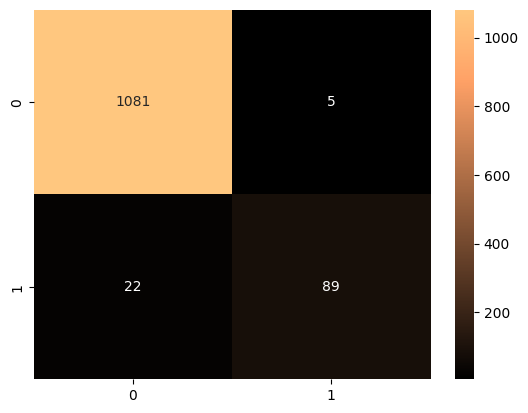

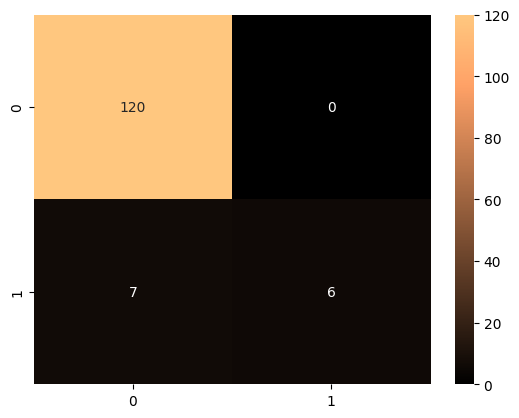

In [22]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_ettrain=list()
mmc_ettest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    ET=ExtraTreesClassifier(random_state=1, n_estimators=400, min_samples_leaf=3, )
    ET_model=ET.fit(X_Train, Y_Train)
    predict_ettrain=ET.predict(X_Train)
    predict_ettest=ET.predict(X_Test)
    Acctrain = metrics.accuracy_score(Y_Train, predict_ettrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_ettest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_ettrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_ettest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_ettrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_ettest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_ettrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_ettest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_ettrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_ettest)
    mmc_train= metrics.matthews_corrcoef(Y_Train, predict_ettrain)
    mmc_ettrain.append(mmc_train)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_ettest)
    mmc_ettest.append(mmc_test)
   
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_ettrain))
print("test", metrics.classification_report(Y_Test, predict_ettest)) 
print('Matthews correlation coefficient Train',mean(mmc_ettrain))
print('Matthews correlation coefficient Test',mean(mmc_ettest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


train accuracy 0.9853801169590642
test accuracy 0.9691729323308269
train precision 0.9569622222408144
test precision 0.9119329421750837
train recall 0.9565617666575605
test recall 0.9102084657766476
train f1 0.956721548528988
test f1 0.9081275140497664
train               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1086
           1       0.93      0.90      0.91       111

    accuracy                           0.98      1197
   macro avg       0.96      0.95      0.95      1197
weighted avg       0.98      0.98      0.98      1197

test               precision    recall  f1-score   support

           0       0.98      0.99      0.99       120
           1       0.92      0.85      0.88        13

    accuracy                           0.98       133
   macro avg       0.95      0.92      0.93       133
weighted avg       0.98      0.98      0.98       133

Matthews correlation coefficient Train 0.9134920547276915
Matthews correlation coe

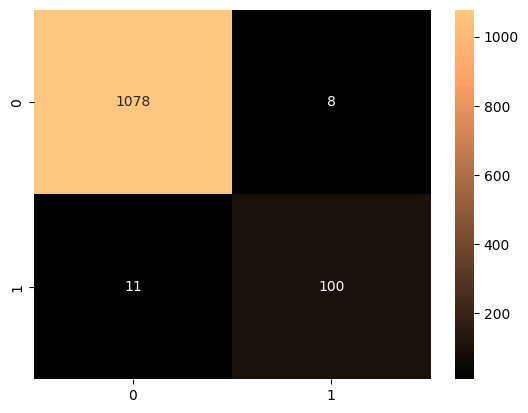

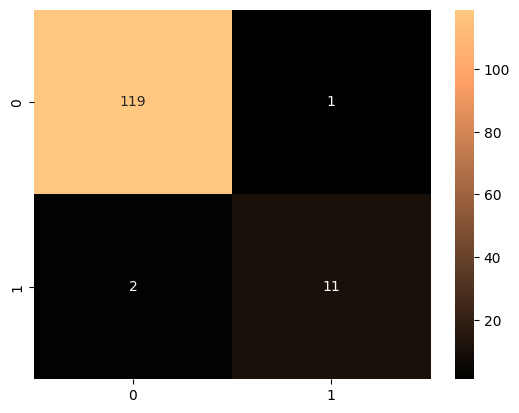

In [17]:
conf_matrix_Train =[] 
conf_matrix_Test=[] 
mmc_dttrain=list()
mmc_dttest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv =StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    DT=DecisionTreeClassifier(random_state=1,  min_samples_split=3, 
                          splitter="best", min_samples_leaf=3,)
    dt_model=DT.fit(X_Train,Y_Train)    
    predict_dttrain=DT.predict(X_Train)
    predict_dttest=DT.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_dttrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_dttest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_dttrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_dttest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_dttrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_dttest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_dttrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_dttest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_dttrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_dttest)
    mmc_train= metrics.matthews_corrcoef(Y_Train, predict_dttrain)
    mmc_dttrain.append(mmc_train)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_dttest)
    mmc_dttest.append(mmc_test)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_dttrain))
print("test", metrics.classification_report(Y_Test, predict_dttest))
print('Matthews correlation coefficient Train',mean(mmc_dttrain))
print('Matthews correlation coefficient Test',mean(mmc_dttest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()



In [18]:
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from io import StringIO

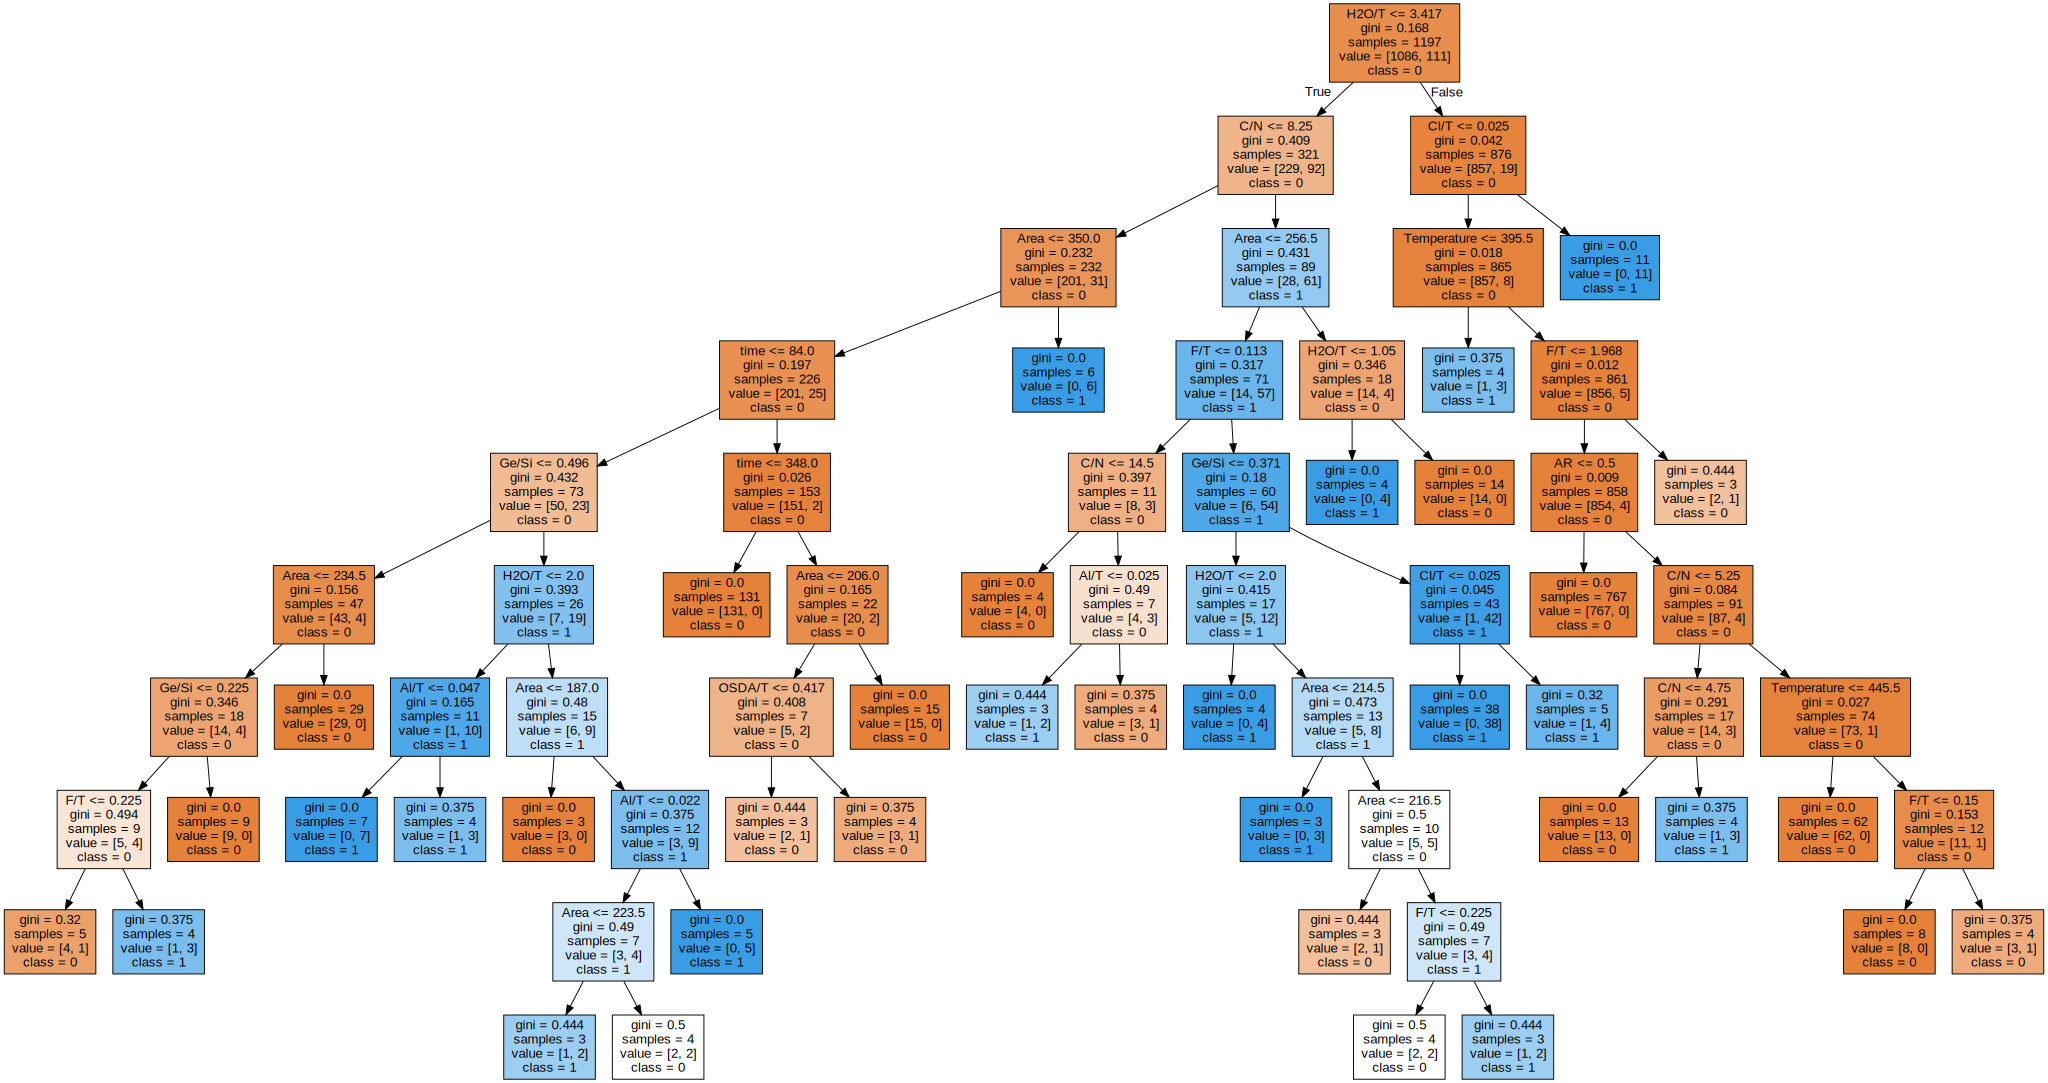

In [19]:
fn=["Ge/Si", "Al/T", "OH/T","H2O/T","F/T", "OSDA/T", 
    "BO/T","Na2O/T", "Cl/T", "Temperature", "time","AR", "Area","C/N","rpm"]
cn=["0", "1",]
dot_data = tree.export_graphviz(DT,  feature_names = fn, class_names=cn,  filled = True)
graph = graphviz.Source(dot_data, format="png") 
graph 

In [20]:
graph.render("DTFDno oversample")


'DTFDno oversample.png'

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_est

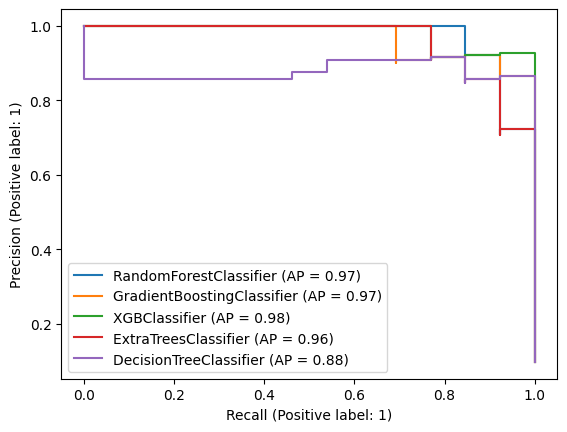

In [23]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
rf_disp=plot_precision_recall_curve(RF,X_Test,Y_Test)
ax=plt.gca()
gb_disp=plot_precision_recall_curve(GB, X_Test,Y_Test, ax=ax)
xgb_disp=plot_precision_recall_curve(XGB, X_Test,Y_Test, ax=ax)
et_disp=plot_precision_recall_curve(ET, X_Test,Y_Test, ax=ax)
dt_disp=plot_precision_recall_curve(DT, X_Test,Y_Test, ax=ax)
plt.show()

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predicti

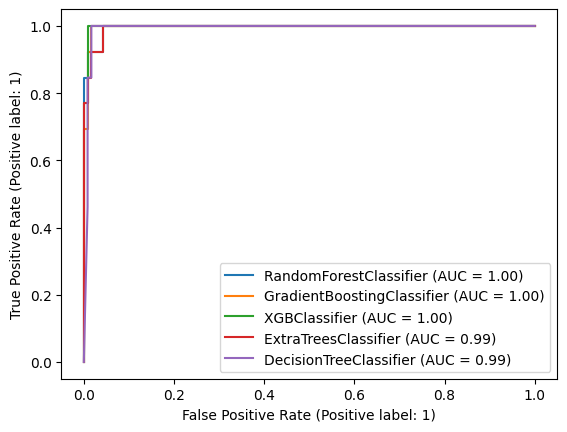

In [24]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
rf_disp=plot_roc_curve(RF,X_Test,Y_Test)
ax=plt.gca()
gb_disp=plot_roc_curve(GB,X_Test,Y_Test, ax=ax)
xgb_disp=plot_roc_curve(XGB,X_Test,Y_Test, ax=ax)
et_disp=plot_roc_curve(ET,X_Test,Y_Test, ax=ax)
dt_disp=plot_roc_curve(DT,X_Test,Y_Test, ax=ax)
plt.show()